# In-class exercise for Lecture 10

We'll be using data downloaded from this [site](https://elifesciences.org/articles/49555/figures) which was used in the following paper:

Protsiv, Myroslava, et al. "Decreasing human body temperature in the United States since the Industrial Revolution." eLife 9 (2020): e49555.

In [1]:
# Import packages

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

In [2]:
# Use pandas to read the data

temp = pd.read_csv('data/combined_data.csv')
temp.head()

,Unnamed: 0,temp,study_ID,age,weight_KG,height_CM,BMI,period,birth_cohort,exam_year,exam_month,sex,temp_adjusted,temp_C,temp_adjC,birth_year,race,time_HR,sample_weights
0,1,98.199997,vet_100501002,51.0,78.925008,177.80,24.966124,1860-1940,1840s,1891.0,9.0,male,98.109997,36.777776,36.727776,1841.0,white,NaN,0.000012
1,2,98.500000,vet_100501002,61.0,88.450440,173.99,29.218063,1860-1940,1840s,1901.0,7.0,male,98.410000,36.944444,36.894444,1841.0,white,NaN,0.000012
2,3,98.800003,vet_100501002,62.0,88.450440,177.80,27.979277,1860-1940,1840s,1902.0,11.0,male,98.710003,37.111113,37.061113,1841.0,white,NaN,0.000012
3,4,98.400002,vet_100501004,44.0,79.378600,173.99,26.221339,1860-1940,1840s,1890.0,11.0,male,98.310002,36.888890,36.838890,1846.0,white,NaN,0.000012
4,5,98.400002,vet_100501004,45.0,79.378600,176.53,25.472196,1860-1940,1840s,1891.0,5.0,male,98.310002,36.888890,36.838890,1846.0,white,NaN,0.000012


In [3]:
# Keep all the recordings from only the 2000's (earlier than that was biased)

temp_recent = temp[temp['exam_year']> 2000]
temp_recent.head()

,Unnamed: 0,temp,study_ID,age,weight_KG,height_CM,BMI,period,birth_cohort,exam_year,exam_month,sex,temp_adjusted,temp_C,temp_adjC,birth_year,race,time_HR,sample_weights
99201,99202,98.2,stride_ST_646376,25.666667,89.811216,187.965228,25.42,2007-2017,1990s,2016.0,NaN,male,98.2,36.777778,36.777778,1990.333333,white,13.0,0.000002
99202,99203,96.8,stride_ST_646376,25.583333,89.811216,187.965228,25.42,2007-2017,1990s,2016.0,NaN,male,96.8,36.000000,36.000000,1990.416667,white,11.0,0.000002
99203,99204,97.7,stride_ST_646376,25.583333,91.625584,187.941804,25.94,2007-2017,1990s,2016.0,NaN,male,97.7,36.500000,36.500000,1990.416667,white,8.0,0.000002
99204,99205,97.4,stride_ST_646376,25.416667,89.811216,187.965228,25.42,2007-2017,1990s,2016.0,NaN,male,97.4,36.333333,36.333333,1990.583333,white,14.0,0.000002
99205,99206,97.0,stride_ST_646376,24.333333,89.811216,188.002211,25.41,2007-2017,1990s,2015.0,NaN,male,97.0,36.111111,36.111111,1990.666667,white,10.0,0.000002


The average temperature is 97.99024388556646
The standard devation of temperatures is 0.6673836357814591


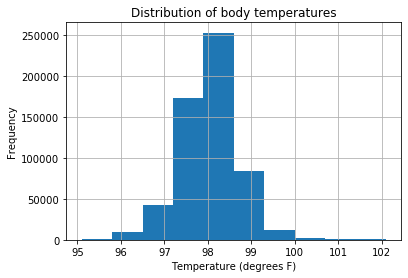

In [4]:
# Check out the distribution from our 
recent_temp_mean = temp_recent['temp'].mean()
recent_temp_stdev = np.std(temp_recent['temp'], ddof = 1)   # ddof should be 0

print(f'The average temperature is {recent_temp_mean}')
print(f'The standard devation of temperatures is {recent_temp_stdev}')

temp_recent['temp'].hist()
plt.title('Distribution of body temperatures')
plt.xlabel('Temperature (degrees F)')
plt.ylabel('Frequency');

# What percentage of people have a temperature between 98.0 and 99.0?

# Or... what percentage of people have a temperature above 98.6?
Hint: body temperatures are normally distributed.

# Solution

For these solutions, we will assume we have the population parameters. That is, that the mean and standard deviation we calculate from the data are the true population values. We will discuss this assumption in class on Tuesday.

In [5]:
# What percentage have a temperature above 98? Calculate the Z score.
Z_98 = (98 - recent_temp_mean)/recent_temp_stdev
print(f'Z_98 is {Z_98}')

# What percentage have a temperature above 99? Calculate the Z score.
Z_99 = (99 - recent_temp_mean)/recent_temp_stdev
print(f'Z_99 is {Z_99}')



Z_98 is 0.014618450184381942
Z_99 is 1.5130070027131994


In [10]:
# Using a standard normal table, we can see that:
# Z_98 --> 0.496   so 49.6% of people have temperature above 98
# Z_99 --> 0.0655  so 6.55% of people have temperature above 99

# Or we can use stats.norm.sf(abs(z_score)) to calculate it directly.

# Subtract to find the percentage of people with a temperature between 98 and 99
final_proportion = 0.496 - 0.0655
print(f'The proportion of people that have a temperature between 98 and 99 degrees is {final_proportion}')

The proportion of people that have a temperature between 98 and 99 degrees is 0.4305


In [12]:
# What proportion of people have a temperature above 98.6? Should be about 0.5, right?

Z_986 = (98.6 - recent_temp_mean)/recent_temp_stdev
print(f'Z_986 is {Z_986}')

# Using a table we find that Z_986 --> 0.1814
print('The proportion of people having a temperature higher than 98.6 is 0.1814')

Z_986 is 0.9136515817016639
The proportion of people having a temperature higher than 98.6 is 0.1814


In [ ]:
## Wow so maybe 98.6 isn't the average temperature after all. In fact, the paper cited at the top of the notebook 
## suggests that body temperatures have been decreasing over time.